# SI608 Midpoint report DVD Analysis

> Decided to analyze only copurchasing network of dvds since the amount of nodes was managable to predict and draw network stats

In [3]:
#import needed packages
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#overall meta_data
meta_graph = pd.read_csv('clean_meta.txt')

In [5]:
meta_graph.shape

(542683, 6)

In [6]:
meta_graph.head()

,Id,title,group,categories,totalreviews,avgrating
0,1,Patterns of Preaching: A Sermon Sampler,Book,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,2,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,5,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,2,0,0.0


In [9]:
#drop all columns that are not Book, Music, DVD, and Video
want=['Book', 'Music', 'DVD', 'Video']
meta_graph2=meta_graph[meta_graph.group.isin(want)]

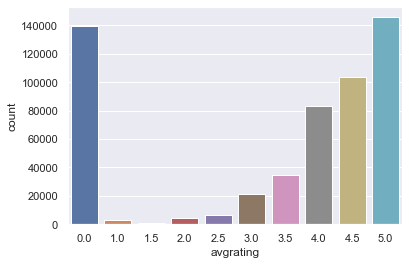

In [12]:
#graph of rating distribution
sns.countplot(x='avgrating',data=meta_graph2)

In [18]:
df_plot = meta_graph2.groupby(['group', 'avgrating']).size().reset_index().pivot(columns='group', index='avgrating', values=0)
# df_plot = meta_graph2.groupby(['group', 'avgrating']).size().reset_index().pivot(columns='avgrating', index='group', values=0)

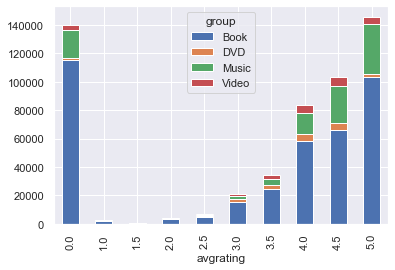

In [19]:
#graph of rating distribution by group
df_plot.plot.bar(stacked=True)

In [21]:
#obtain count of product groups
meta_graph2.groupby('group').size()

group
Book     393561
DVD       19828
Music    103143
Video     26131
dtype: int64

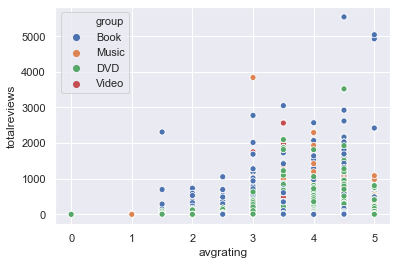

In [23]:
#relationship between rating and total reviews
sns.scatterplot(x="avgrating", y="totalreviews",hue='group', data=meta_graph2)

In [47]:
#import the cleaned data files for meta data
meta = pd.read_csv('meta.csv', usecols=['ASIN','Id','Copurchased', 'Group', 'SalesRank', 'TotalReviews', 'AvgRating', 'DegreeCentrality', 'ClusteringCoeff'] )

In [48]:
#merge both tables on id with certiam columns that are missing
meta_join = pd.merge(meta_graph2, meta[['Id','ASIN','Copurchased','SalesRank', 'DegreeCentrality', 'ClusteringCoeff']], on='Id')

In [49]:
#find proportion of popularity with the sales rank divided by the max sales rank 
max_rank=max(meta_join['SalesRank'])
meta_join['popularity']=meta_join['SalesRank']/max_rank

In [50]:
meta_join.shape

(542663, 12)

In [51]:
meta_join.head()

,Id,title,group,categories,totalreviews,avgrating,ASIN,Copurchased,SalesRank,DegreeCentrality,ClusteringCoeff,popularity
0,1,Patterns of Preaching: A Sermon Sampler,Book,2,2,5.0,0827229534,0804215715 156101074X 0687023955 0687074231 08...,396585,8,0.80,0.104410
1,2,Candlemas: Feast of Flames,Book,2,12,4.5,0738700797,0738700827 1567184960 1567182836 0738700525 07...,168596,9,0.85,0.044387
2,3,World War II Allied Fighter Planes Trading Cards,Book,1,1,5.0,0486287785,NaN,1270652,0,0.00,0.334527
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,5,1,4.0,0842328327,0842328130 0842330313 0842328610 0842328572,631289,6,0.79,0.166201
4,5,Prayers That Avail Much for Business: Executive,Book,2,0,0.0,1577943082,157794349X 0892749504 1577941829 0892749563,455160,4,1.00,0.119831


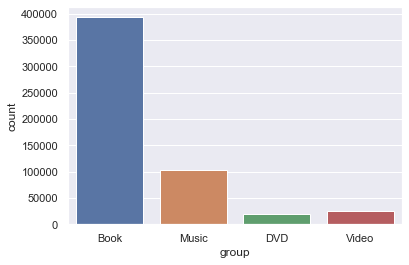

In [92]:
sns.countplot(x='group',data=meta_graph2)

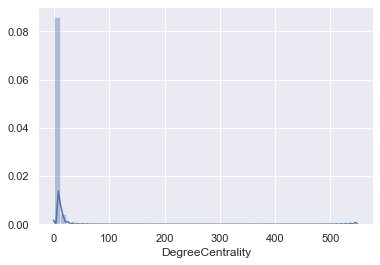

In [87]:
sns.distplot(meta_join['DegreeCentrality'])

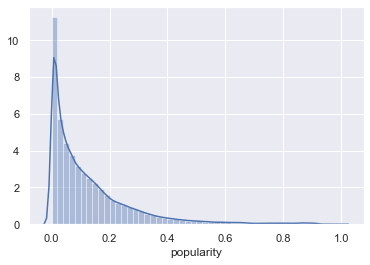

In [88]:
sns.distplot(meta_join['popularity'])

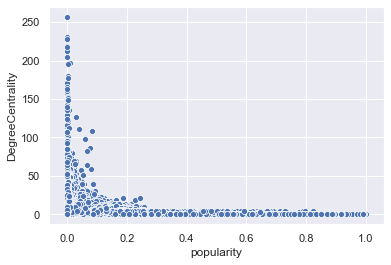

In [57]:
#relationship of degree and popularity
sns.scatterplot(x="popularity", y="DegreeCentrality", data=meta_join[meta_join.DegreeCentrality < 300])

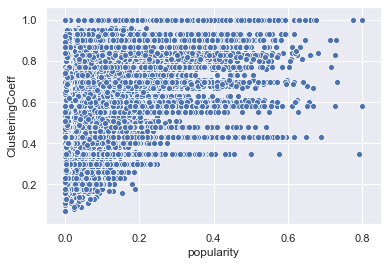

In [56]:
sns.scatterplot(x="popularity", y="ClusteringCoeff", data=meta_join[meta_join.ClusteringCoeff!=0])

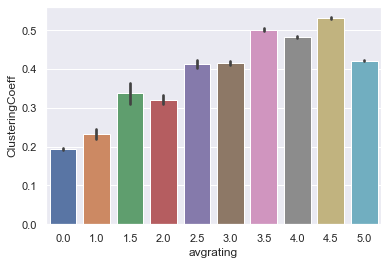

In [59]:
sns.barplot(x="avgrating", y="ClusteringCoeff", data=meta_join)

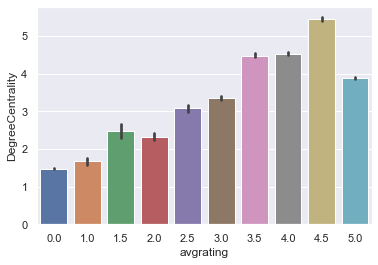

In [60]:
sns.barplot(x="avgrating", y="DegreeCentrality", data=meta_join)

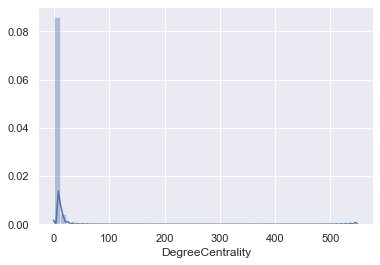

In [67]:
sns.distplot(meta_join['DegreeCentrality'])

In [62]:
mean_deg=np.mean(meta_join['DegreeCentrality'])
print(mean_deg)

3.6409668615697033


In [63]:
mean_cluster=np.mean(meta_join['ClusteringCoeff'])
print(mean_cluster)

0.3959898131985084


## Import Graph

In [65]:
fhr = open('amazon_co.edgelist', "rb")
G = nx.read_weighted_edgelist(fhr)
fhr.close()

In [69]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 366997
Number of edges: 987942
Average degree:   5.3839


In [70]:
print(nx.density(G))

1.4670252861804297e-05


> Not a very dense network

In [71]:
print(nx.is_connected(G))

False


> Graph has more than one connected component

#### taking a long time, try again later

In [72]:
#find the largest component
components = nx.connected_components(G)
largest_component = max(components, key=len)

In [74]:
#find the diameter of the largest component
# subgraph = G.subgraph(largest_component)
# diameter = nx.diameter(subgraph)
# print("Network diameter of largest component:", diameter)

In [75]:
#get product with highest degree
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [82]:
from operator import itemgetter 
top_deg=[]
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    top_deg.append(d[0])
    print(d)

Top 20 nodes by degree:
('B00008LDNZ', 549)
('0890420254', 324)
('1557987912', 257)
('0684801523', 230)
('0486291138', 228)
('0875163238', 219)
('0805047905', 217)
('0486280861', 212)
('0553212788', 205)
('0671722905', 197)
('0192833723', 196)
('096290497X', 196)
('0812550927', 180)
('0803606540', 179)
('0689710550', 177)
('0451527046', 171)
('0316769487', 165)
('0152026320', 163)
('0761924426', 160)
('0140157352', 158)


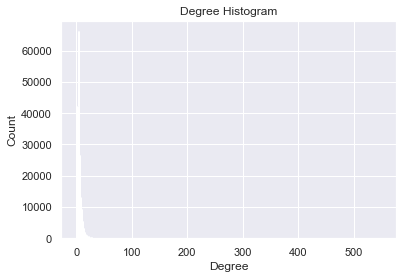

In [91]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

plt.show()

In [83]:
top_degree=meta_join[meta_join['ASIN'].isin(top_deg)]

In [84]:
top_degree

,Id,title,group,categories,totalreviews,avgrating,ASIN,Copurchased,SalesRank,DegreeCentrality,ClusteringCoeff,popularity
21008,21209,Treasure Island (Signet Classic),Book,3,196,4.0,0451527046,0140390839 0486404277 0812550927 0440415942 04...,1674,171,0.73,0.000441
44646,45146,Taber's Cyclopedic Medical Dictionary -Thumb-I...,Book,6,26,4.5,0803606540,0911910107 032301609X,2776,179,0.41,0.000731
54797,55387,Getting to Yes: Negotiating Agreement Without ...,Book,4,81,4.5,0140157352,0553371312 014028852X 0140235310 0140281916 06...,220,158,0.49,0.000058
97688,98756,The Catcher in the Rye,Book,3,2568,4.0,0316769487,0446310786 0684801523 0399501487 0140177396 04...,60,165,0.74,0.000016
192276,194384,Research Design: Qualitative Quantitative an...,Book,3,1,5.0,0761924426,0761901442 0321081897 080504891X 1557987912 07...,1122,160,0.62,0.000295
197450,199628,The Great Gatsby,Book,5,934,4.0,0684801523,0316769487 0553210092 0142000663 0764586017 05...,956,230,0.65,0.000252
219565,222074,Publication Manual of the American Psychologic...,Book,5,50,3.5,1557987912,1557988919 0890420254 080504891X 0761924426,143,257,0.32,0.000038
236425,239107,The Prince,Book,2,212,4.5,0553212788,0486425576 0451527100 0486411214 030681076X,249,205,0.60,0.000066
236642,239327,Confessions (Oxford World's Classics),Book,5,89,4.5,0192833723,0679600876 1928832431 0520227573 0375700188,5089,196,0.43,0.001340
287851,291117,It Works,Book,2,29,4.5,0875163238,0684850028 0967499011,746,219,0.44,0.000196
